In [ ]:
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [74]:
s1, s2, s3 = 'cluster', 'field', 'sim'

In [75]:
# Pe, Ps: probability to be elliptical or sprials (from galaxy zoo)
s = {}

# Cluster galaxies
s[s1] = pd.read_fwf(
    'sample1_cls.dat', 
    names=['cls','ra','dec','z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','class','Zc','sigma','Mvir','Rvir','R200','w','dist','Pe','Ps'],
    skiprows=1
)
# Field galaxies
s[s2] = pd.read_fwf(
    'sample2_field.dat', 
    names=['ra','dec','z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','OH','w','Pe','Ps'],
    skiprows=1
)

# Semi-analytic model
s[s3] = pd.read_fwf(
    'sample3_sim.dat', 
    names=['cls','ig','type','clase','stellarmass','u','g','r','sfr','Mcoldgas','Mhotgas','Tau','OH','bt','ssfr'],
    skiprows=1
)
s[s3]['ur'] = s[s3]['u']-s[s3]['r']


## `sample1.dat` $\rightarrow{}$ Cluster objects

| columnas | descripción |
|:--------:|:-----------|
|'z' | redshift|
|'Mr01'| magnitud absoluta en la banda r a 0.1|
|'ur'| color u-r|
|'mur'| (?)|
|'kr50'| r_50 en kpc(?)|
|'C'| indice de concentración|
|'stellarmass'| masa estelar|
|'sfr'| tasa de formación estelar [$M_{\odot} \mathrm{yr}^{-1}$]|
|'ssfr'| tasa de formación estelar especifica [?]|
|'Dn4000'| 4000 A break (ratio between the average flux density between 4050 and<br> 4250A and that between 3750 and 3950A) [$\mathrm{ergs}^{−1} \mathrm{cm}^{−2} \mathrm{Hz}^{−1}$] |
|'class'| tipo de galaxia en el cúmulo (-1,1,2,3,4,5) (?)|
|'Zc'| redshift del cluster|
|'sigma'| dispersión de velocidad (?)|
|'Mvir'| masa encerrada al radio virial|
|'Rvir'| radio virial|
|'R200'| radio que encierra 200 veces la densidad media del Universo|
|'w'| peso $1/V_{max}$|
|'dist'| distancia al centro del cumulo (?)|
|'Pe'| probabilidad de ser eliptica, según galaxy-zoo|
|'Ps'| probabilidad de ser espiral, según galaxy-zoo|


In [76]:
s['cluster'].query('Rvir < 30 and C<4.5 and Dn4000<2.5 and Dn4000>0.5', inplace=True)

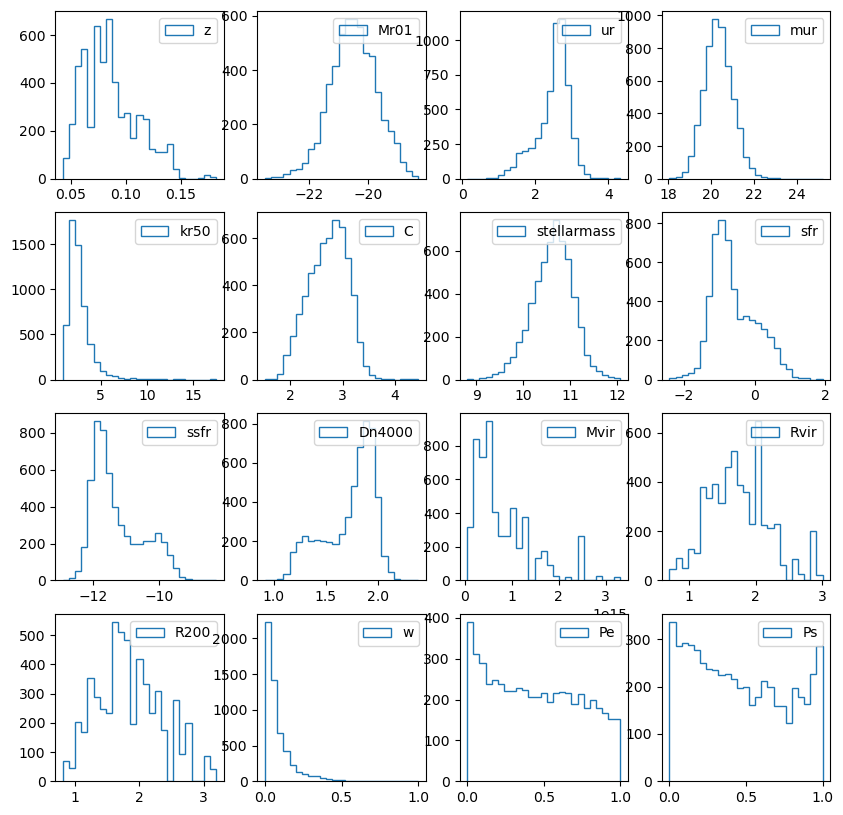

In [78]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
cols = ['z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','Mvir','Rvir','R200', 'w','Pe','Ps']

for col, ax in zip(cols,axes.flatten()):
    ax.hist(s[s1][col], bins=25, label=col, histtype='step')
    ax.legend(loc='upper right')

## `sample2.dat` $\rightarrow{}$ Field objects

| columnas | descripción |
|:--------:|:-----------|
|'z' | redshift|
|'Mr01'| magnitud absoluta en la banda r a 0.1|
|'ur'| color u-r|
|'mur'| (?)|
|'kr50'| r_50 en kpc(?)|
|'C'| indice de concentración|
|'stellarmass'| masa estelar|
|'sfr'| tasa de formación estelar [$M_{\odot} \mathrm{yr}^{-1}$]|
|'ssfr'| tasa de formación estelar especifica [?]|
|'Dn4000'| 4000 A break (ratio between the average flux density between 4050 and<br> 4250A and that between 3750 and 3950A) [$\mathrm{ergs}^{−1} \mathrm{cm}^{−2} \mathrm{Hz}^{−1}$] |
|'OH'| (?)|
|'w'| peso $1/V_{max}$|
|'dist'| distancia al centro del cumulo (?)|
|'Ps'| probabilidad de ser espiral, según galaxy-zoo|

In [79]:
s['field'].query('stellarmass > 8 and sfr > -8 and ur < 5 and kr50 < 20 and C < 5 and ur > 0 and Dn4000<2.5 and Dn4000>0.8 and Ps>0 and Pe>0', inplace=True)

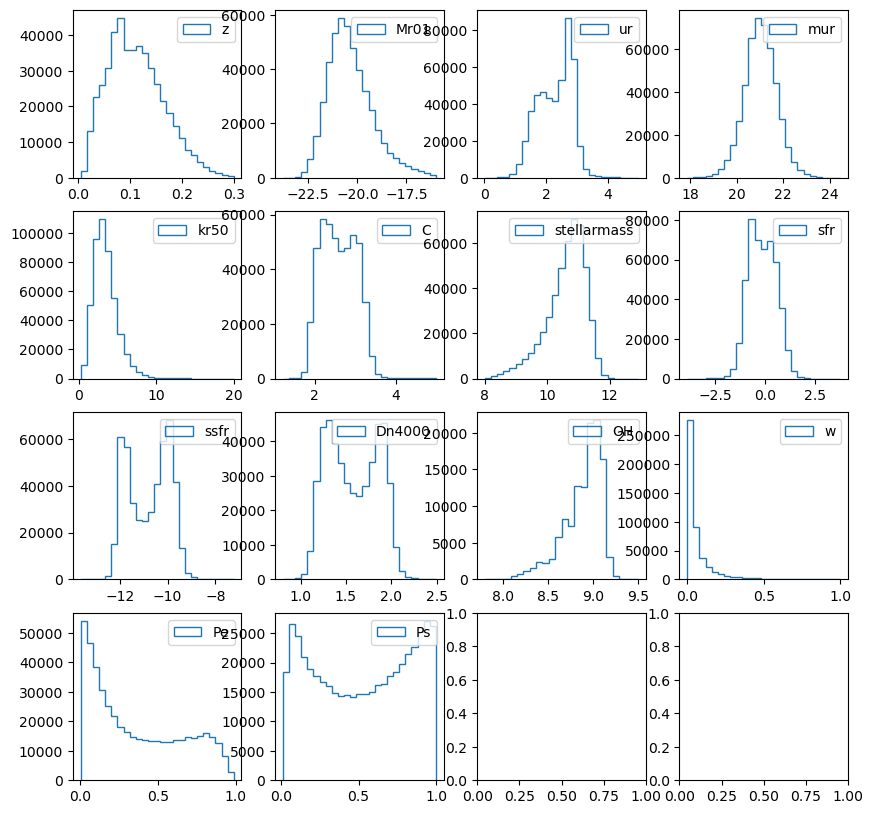

In [80]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
cols = ['z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','OH','w','Pe','Ps']

for col, ax in zip(cols,axes.flatten()):
    if col=='OH':
        ax.hist(s[s2][col], bins=np.linspace(7.8,9.5,25), label=col, histtype='step')
    else:
        ax.hist(s[s2][col], bins=25, label=col, histtype='step')
    
    ax.legend(loc='upper right')

## `sample3.dat` $\rightarrow{}$ Semi-analytic model

| columnas | descripción |
|:--------:|:-----------|
|'cls' | cluster id |
|'ig' | galaxy id |
|'type'| (?) |
|'stellarmass'| masa estelar|
|'u'| u band magnitude|
|'g'| g band magnitude|
|'r'| r band magnitude|
|'sfr'| tasa de formación estelar [$M_{\odot} \mathrm{yr}^{-1}$]|
|'Mcoldgas'| masa de gas frio [$\log M_{\odot}$] |
|'Mhotdgas'| masa de gas caliente [$\log M_{\odot}$] |
|'Tau'| edad de la galaxia [?]|
|'OH'| (?) |
|'bt'| (?) |
|'ssfr'| tasa de formación estelar especifica [?]|

In [91]:
s[s3].query('Mhotgas != 99 and Mcoldgas != 99 and sfr!=99', inplace=True)

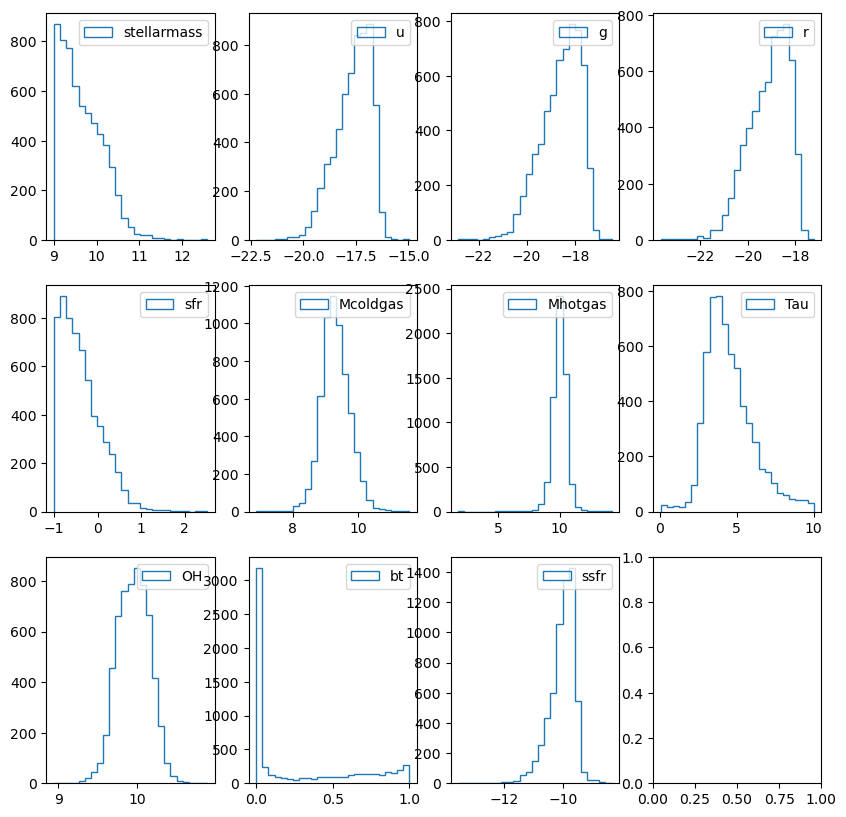

In [92]:
fig, axes = plt.subplots(3,4, figsize=(10,10))
cols = ['stellarmass','u','g','r','sfr','Mcoldgas','Mhotgas','Tau','OH','bt','ssfr']

for col, ax in zip(cols,axes.flatten()):
    ax.hist(s[s3][col], bins=25, label=col, histtype='step')
    ax.legend(loc='upper right')

## eee

Text(0.5, 0, 'redshift')

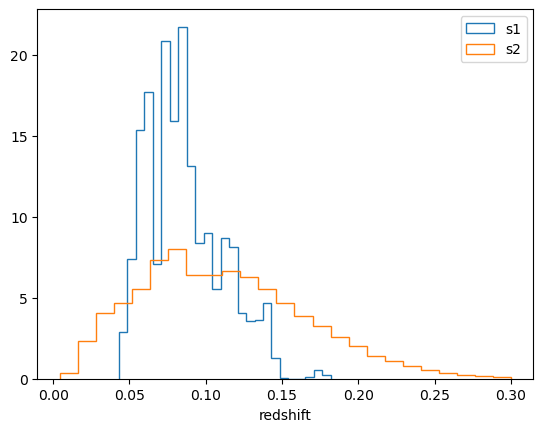

In [73]:
# redshift distributions

fig, ax = plt.subplots()
for name, sample in s.items():
    try:
        ax.hist(sample['z'], bins=25, density=True, histtype='step', label=name)
    except KeyError:
        continue
ax.legend()
#plt.semilogy()
ax.set_xlabel('redshift')

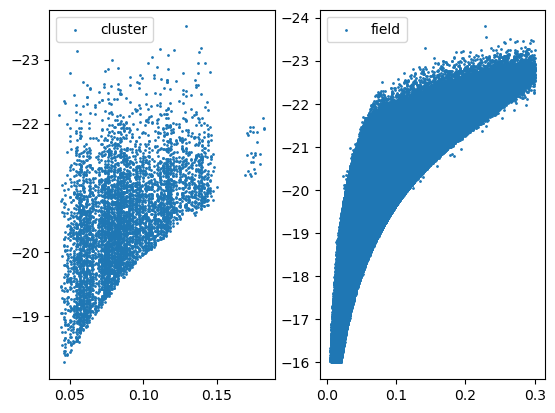

In [102]:
fig, axes = plt.subplots(1,2)
for ax, sample in zip(axes.flatten(), [s1, s2]): 
    ax.scatter(s[sample]['z'], s[sample]['Mr01'], s=1, label=sample)
    ax.invert_yaxis()
    ax.legend()

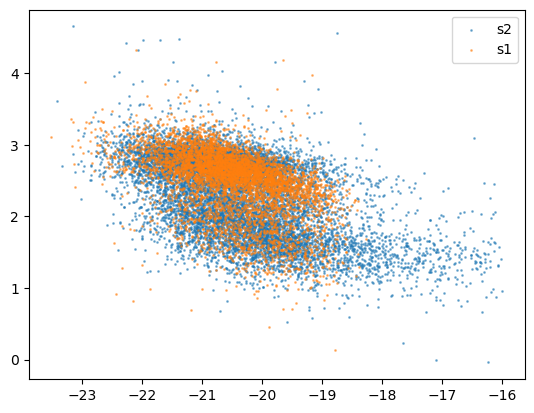

In [110]:
# 

fig, ax = plt.subplots()
ax.scatter(s['s2'].head(10000)['Mr01'], s['s2'].head(10000)['ur'], s=1, alpha=0.5, label='s2')
ax.scatter(s['s1']['Mr01'], s['s1']['ur'], s=1, alpha=0.5, label='s1')
ax.legend()

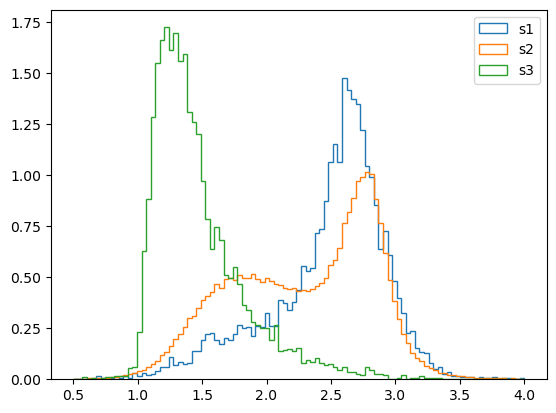

In [111]:
# 

fig, ax = plt.subplots()
for name, sample in s.items():
    ax.hist(sample['ur'], bins=np.linspace(0.5,4,100), density=True, histtype='step', label=name)
ax.legend()

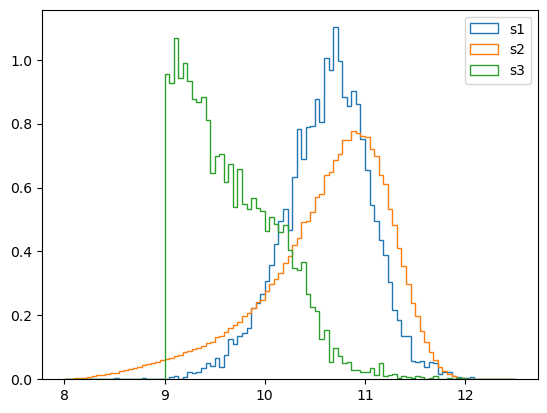

In [112]:
# 

fig, ax = plt.subplots()
for name, sample in s.items():
    ax.hist(sample['stellarmass'], bins=np.linspace(8,12.5,100), density=True, histtype='step', label=name)
ax.legend()

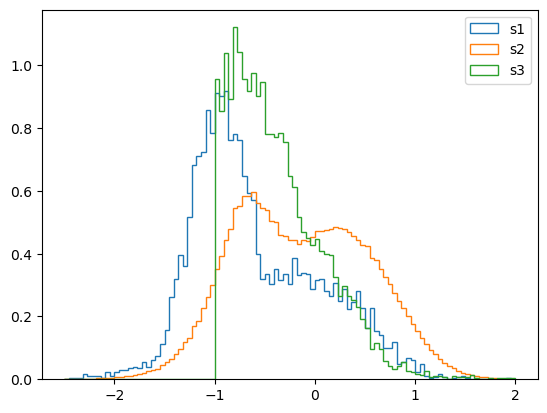

In [113]:
# 

fig, ax = plt.subplots()
for name, sample in s.items():
    ax.hist(sample['sfr'], bins=np.linspace(-2.5,2,100), density=True, histtype='step', label=name)
ax.legend()


(array([0.        , 0.        , 0.        , 0.00249358, 0.        ,
        0.00249358, 0.        , 0.        , 0.        , 0.00249358,
        0.        , 0.        , 0.        , 0.        , 0.00249358,
        0.        , 0.00249358, 0.        , 0.00249358, 0.        ,
        0.        , 0.        , 0.00498715, 0.01496146, 0.02493577,
        0.03740366, 0.0324165 , 0.02992293, 0.06732658, 0.07979447,
        0.13465317, 0.12218528, 0.19948617, 0.29673568, 0.37902373,
        0.51617047, 0.61840713, 0.73311168, 0.86028412, 1.04979598,
        1.00989875, 1.00740517, 0.98745655, 0.97249509, 0.83285477,
        0.78298323, 0.65581079, 0.62090071, 0.56354844, 0.47876681,
        0.44136316, 0.34660722, 0.33912649, 0.25434487, 0.17953755,
        0.14462747, 0.09475593, 0.07730089, 0.06732658, 0.02992293,
        0.02742935, 0.01745504, 0.00748073, 0.00748073, 0.01745504,
        0.01496146, 0.00249358, 0.00498715, 0.00498715, 0.00249358,
        0.        , 0.00498715, 0.00748073, 0.  

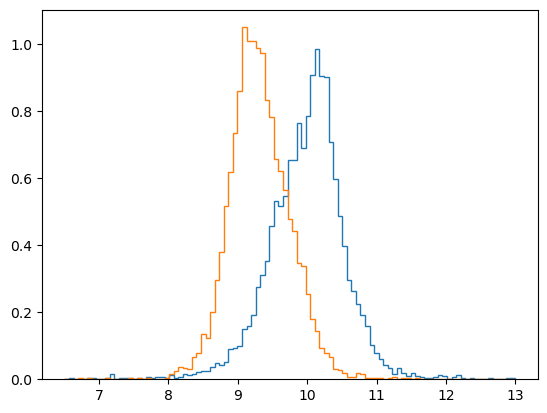

In [114]:
# 
plt.hist(s['s3']['Mhotgas'], bins=np.linspace(6.5,13,100), density=True, histtype='step')
plt.hist(s['s3']['Mcoldgas'], bins=np.linspace(6.5,13,100), density=True, histtype='step')

(array([2925.,  107.,   84.,   69.,   76.,   53.,   63.,   50.,   39.,
          33.,   27.,   28.,   24.,   26.,   25.,   15.,   17.,   26.,
          19.,   15.,   21.,   12.,   19.,   10.,   15.,   14.,    9.,
          13.,   17.,   13.,   25.,   20.,   21.,   19.,   21.,   16.,
          14.,   18.,   15.,   19.,   24.,   21.,   22.,   22.,   19.,
          28.,   36.,   16.,   20.,   24.,   26.,   29.,   26.,   24.,
          22.,   28.,   29.,   21.,   17.,   27.,   21.,   33.,   35.,
          30.,   37.,   33.,   34.,   28.,   46.,   28.,   30.,   31.,
          33.,   37.,   28.,   37.,   33.,   36.,   31.,   38.,   33.,
          27.,   35.,   29.,   37.,   34.,   47.,   46.,   31.,   37.,
          48.,   43.,   38.,   52.,   59.,   52.,   67.,   42.,   55.,
         104.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

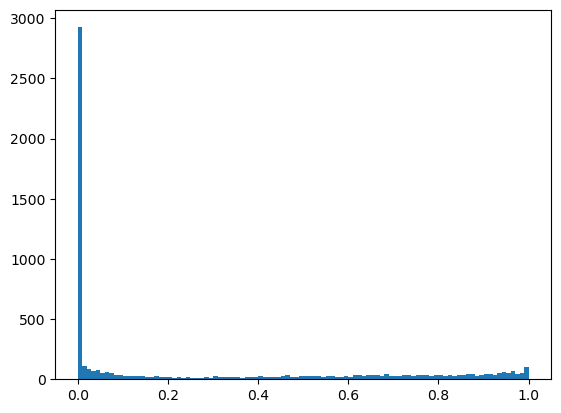

In [119]:
# 
plt.hist(s['s3']['bt'], bins=100)

(array([ 10.,   6.,   7.,   2.,   4.,   5.,   4.,   3.,   3.,   4.,   6.,
          8.,   6.,   4.,   3.,   5.,  10.,   8.,   8.,  10.,   8.,  22.,
         29.,  37.,  55.,  71.,  83., 112., 115., 131., 157., 177., 173.,
        205., 189., 214., 196., 210., 207., 170., 164., 170., 171., 177.,
        175., 138., 114., 145., 145., 135., 129., 112., 101., 112.,  84.,
         88.,  88.,  93.,  65.,  75.,  74.,  71.,  55.,  55.,  39.,  42.,
         34.,  41.,  41.,  40.,  39.,  25.,  30.,  24.,  27.,  21.,  22.,
         21.,  17.,   9.,  18.,  17.,  15.,  11.,  18.,   8.,   9.,   9.,
         18.,   5.,  11.,   7.,  10.,  11.,  12.,  12.,   6.,   9.,   4.,
         13.]),
 array([0.053  , 0.15244, 0.25188, 0.35132, 0.45076, 0.5502 , 0.64964,
        0.74908, 0.84852, 0.94796, 1.0474 , 1.14684, 1.24628, 1.34572,
        1.44516, 1.5446 , 1.64404, 1.74348, 1.84292, 1.94236, 2.0418 ,
        2.14124, 2.24068, 2.34012, 2.43956, 2.539  , 2.63844, 2.73788,
        2.83732, 2.93676, 3.0362 ,

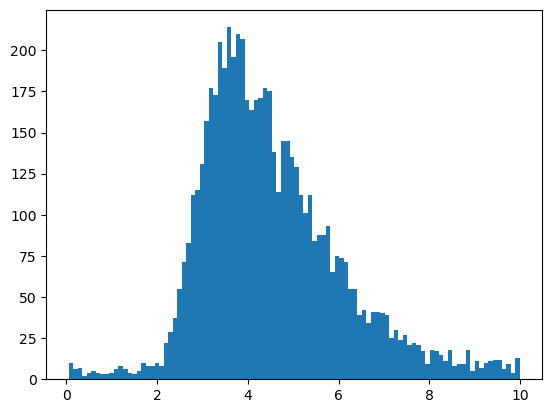

In [116]:
plt.hist(s['s3']['Tau'], bins=100)

(array([  1.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   3.,   3.,   1.,   3.,   4.,   1.,
          4.,  10.,  11.,  10.,  11.,  12.,  15.,  16.,  18.,  30.,  38.,
         31.,  58.,  65.,  85., 106., 112., 154., 133., 152., 183., 194.,
        190., 191., 201., 180., 211., 182., 202., 193., 197., 208., 235.,
        213., 215., 198., 203., 169., 163., 205., 149., 152., 130., 110.,
         95.,  83.,  63.,  71.,  60.,  35.,  36.,  18.,  12.,  16.,   8.,
          6.,   9.,   5.,   3.,   3.,   1.,   2.,   3.,   3.,   1.,   0.,
          1.,   0.,   0.,   1.,   0.,   1.,   2.,   0.,   1.,   1.,   0.,
          1.]),
 array([ 8.943 ,  8.9625,  8.982 ,  9.0015,  9.021 ,  9.0405,  9.06  ,
         9.0795,  9.099 ,  9.1185,  9.138 ,  9.1575,  9.177 ,  9.1965,
         9.216 ,  9.2355,  9.255 ,  9.2745,  9.294 ,  9.3135,  9.333 ,
         9.3525,  9.372 ,  9.3915,  9.411 ,  9.4305,  9.45  ,  9.4695,
         9.489 ,  9.5085,  9.528 ,

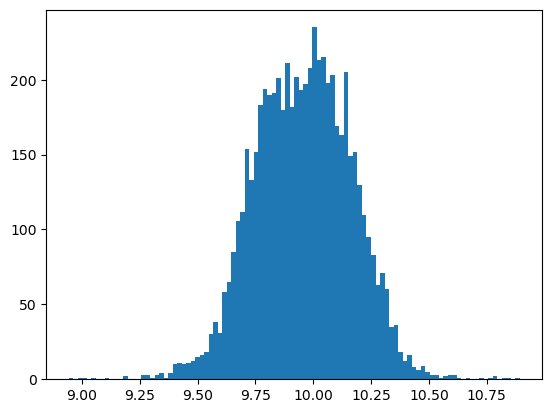

In [117]:
plt.hist(s['s3']['OH'], bins=100)

(array([  2.,   0.,   2.,   1.,   0.,   4.,   4.,   4.,  16.,  46., 228.,
        427., 577., 580., 597., 563., 475., 434., 326., 247., 255., 179.,
        186., 147., 114.,  94.,  90.,  75.,  67.,  50.,  50.,  42.,  31.,
         36.,  23.,  27.,  17.,  16.,  14.,   9.,  21.,  11.,   7.,   0.,
          3.,   2.,   2.,   3.,   2.,   2.]),
 array([0.443 , 0.5011, 0.5592, 0.6173, 0.6754, 0.7335, 0.7916, 0.8497,
        0.9078, 0.9659, 1.024 , 1.0821, 1.1402, 1.1983, 1.2564, 1.3145,
        1.3726, 1.4307, 1.4888, 1.5469, 1.605 , 1.6631, 1.7212, 1.7793,
        1.8374, 1.8955, 1.9536, 2.0117, 2.0698, 2.1279, 2.186 , 2.2441,
        2.3022, 2.3603, 2.4184, 2.4765, 2.5346, 2.5927, 2.6508, 2.7089,
        2.767 , 2.8251, 2.8832, 2.9413, 2.9994, 3.0575, 3.1156, 3.1737,
        3.2318, 3.2899, 3.348 ]),
 <BarContainer object of 50 artists>)

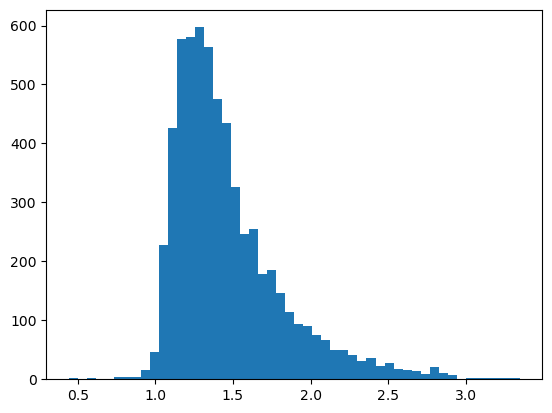

In [118]:
plt.hist(s['s3']['u']-s['s3']['r'], bins=50)

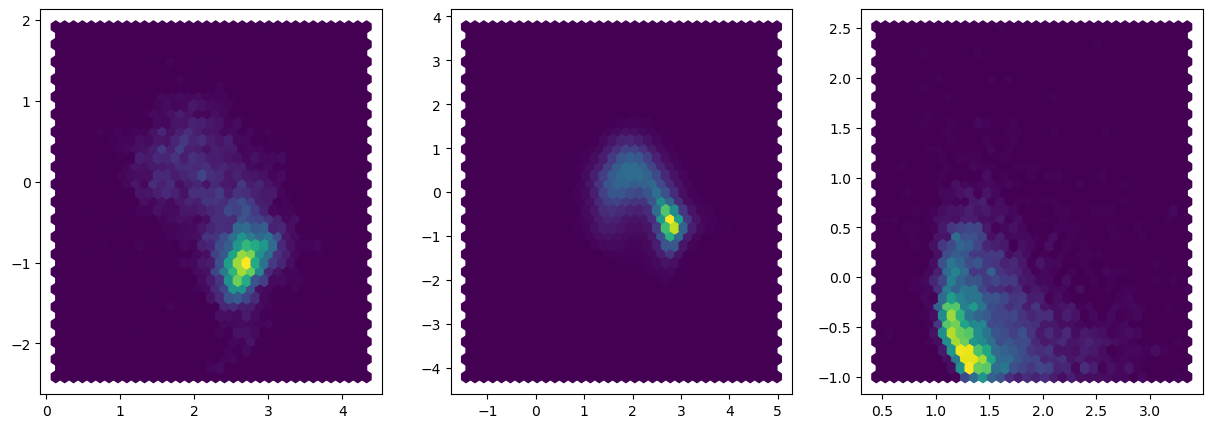

In [62]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
for sam, ax in zip(s.values(), axes):
    ax.hexbin(sam['ur'], sam['sfr'], gridsize=35)

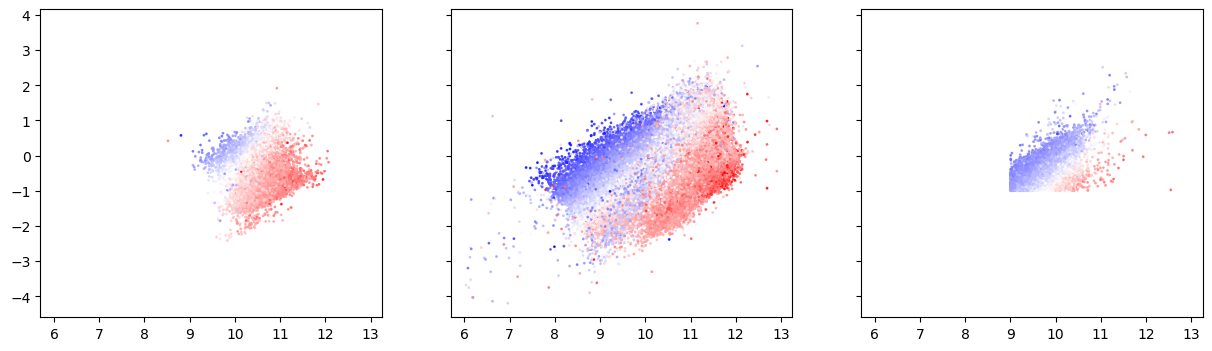

In [77]:
fig, axes = plt.subplots(1,3, figsize=(15,4), sharex=True, sharey=True)
for sam, ax in zip(s.values(), axes):
    #ax.hexbin(sam['stellarmass'], sam['sfr'], gridsize=50)
    ax.scatter(sam['stellarmass'], sam['sfr'], s=1, c=sam['ur'], vmin=0, vmax=4, cmap='bwr', alpha=0.8)